### 特征提取（六）——颜色矩&颜色特征



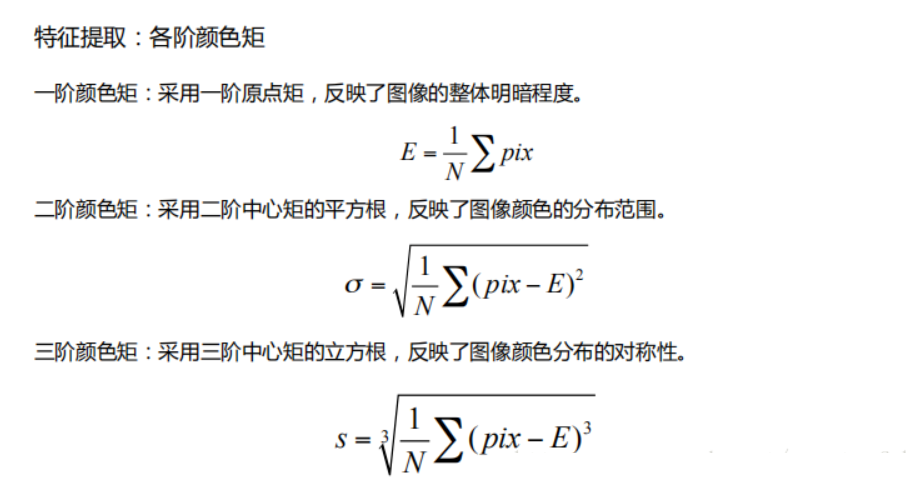

https://www.cnblogs.com/klchang/p/6512310.html

颜色矩原理及Python实现

In [2]:
import cv2
import numpy as np

# Compute low order moments(1,2,3)
def color_moments(img):
    # Convert BGR to HSV colorspace
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Split the channels - h,s,v
    h, s, v = cv2.split(hsv)
    # Initialize the color feature
    color_feature = []
    # N = h.shape[0] * h.shape[1]
    # The first central moment - average 
    h_mean = np.mean(h)  # np.sum(h)/float(N)
    s_mean = np.mean(s)  # np.sum(s)/float(N)
    v_mean = np.mean(v)  # np.sum(v)/float(N)
    color_feature.extend([h_mean, s_mean, v_mean])
    # The second central moment - standard deviation
    h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
    s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
    v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
    color_feature.extend([h_std, s_std, v_std])
    # The third central moment - the third root of the skewness
    h_skewness = np.mean(abs(h - h.mean())**3)
    s_skewness = np.mean(abs(s - s.mean())**3)
    v_skewness = np.mean(abs(v - v.mean())**3)
    h_thirdMoment = h_skewness**(1./3)
    s_thirdMoment = s_skewness**(1./3)
    v_thirdMoment = v_skewness**(1./3)
    color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])

    return color_feature

In [3]:
img = cv2.imread("dujuan_1.jpg")
color_moments(img)

[57.28315659511237,
 85.0695741127548,
 138.747915574062,
 52.94890505089301,
 55.17334104943877,
 45.218345962862124,
 61.03426510482147,
 60.472956554430276,
 51.83581627053663]

**上面的就是对H、S、V 3个分量的1阶矩、2阶矩和三阶矩**

### 下面这个我又心动了！！！

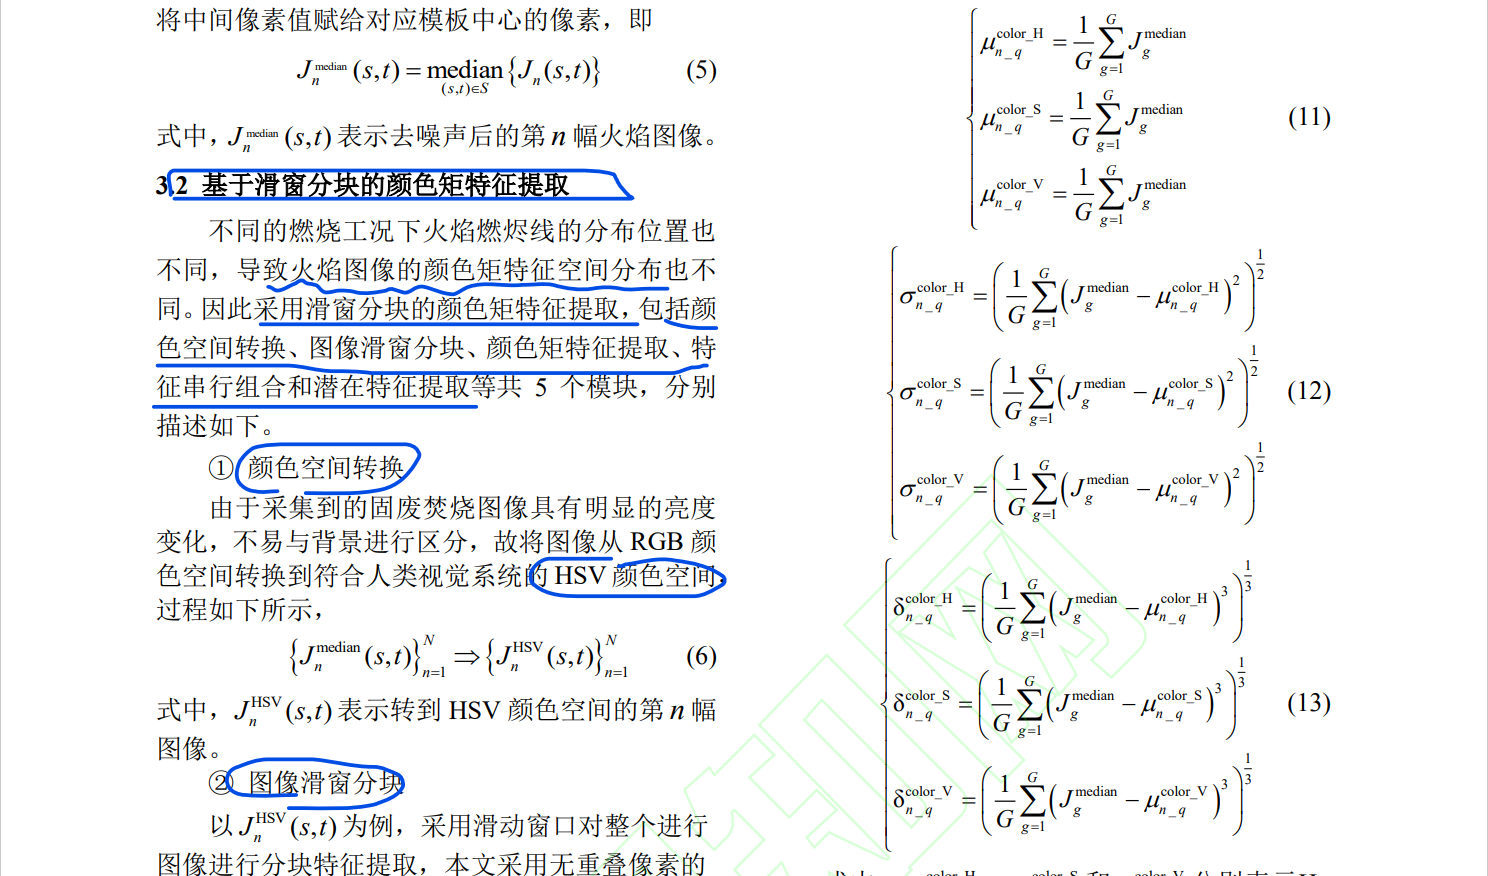

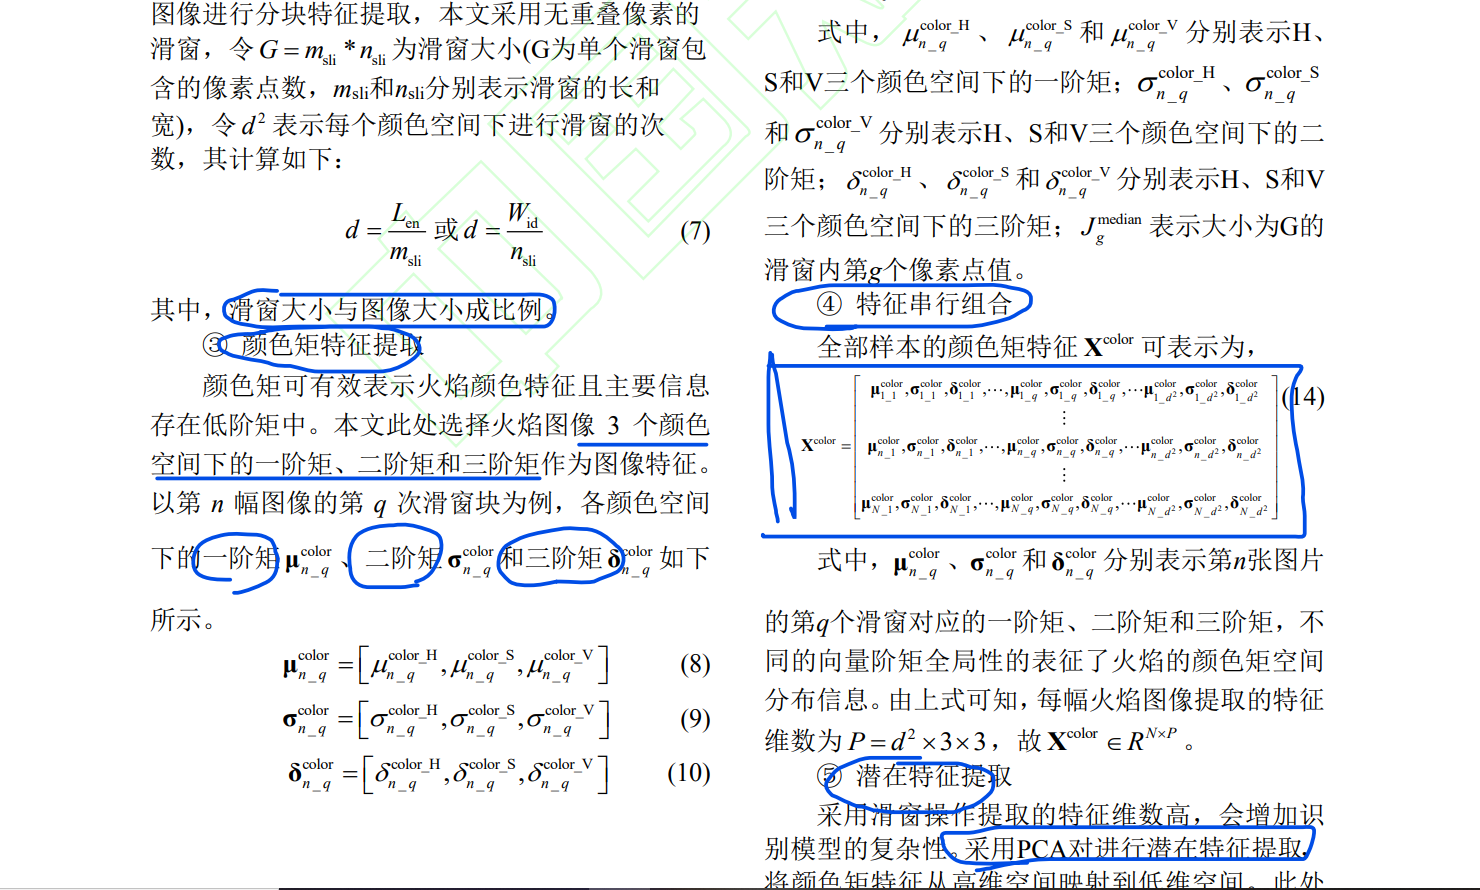

https://blog.csdn.net/zhou4411781/article/details/95966461

Python对图片进行滑动窗提取局部区域

In [4]:
import cv2

In [5]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize[1]):
        for x in range(0, image.shape[1], stepSize[0]):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [6]:
# 返回滑动窗结果集合，本示例暂时未用到
def get_slice(image, stepSize, windowSize):
    slice_sets = []
    for (x, y, window) in sliding_window(image, stepSize, windowSize):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != windowSize[1] or window.shape[1] != windowSize[0]:
            continue
        slice = image[y:y + windowSize[1], x:x + windowSize[0]]
        slice_sets.append(slice)
    return slice_sets


In [7]:
image = cv2.imread('dujuan_1.jpg')

# 自定义滑动窗口的大小
w = image.shape[1]
h = image.shape[0]
# 本代码将图片分为3×3，共九个子区域，winW, winH和stepSize可自行更改
(winW, winH) = (int(w/3),int(h/3))
stepSize = (int(w/3), int(h/3))
cnt = 0

In [14]:
color_feature_all =[]
for (x, y, window) in sliding_window(image, stepSize=stepSize, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
        continue
    slice = image[y:y+winH,x:x+winW]
    hsv = cv2.cvtColor(slice, cv2.COLOR_BGR2HSV)
    # Split the channels - h,s,v
    h, s, v = cv2.split(hsv)
    # Initialize the color feature
    color_feature = []
    # N = h.shape[0] * h.shape[1]
    # The first central moment - average 
    h_mean = np.mean(h)  # np.sum(h)/float(N)
    s_mean = np.mean(s)  # np.sum(s)/float(N)
    v_mean = np.mean(v)  # np.sum(v)/float(N)
    color_feature.extend([h_mean, s_mean, v_mean])
    # The second central moment - standard deviation
    h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
    s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
    v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
    color_feature.extend([h_std, s_std, v_std])
    # The third central moment - the third root of the skewness
    h_skewness = np.mean(abs(h - h.mean())**3)
    s_skewness = np.mean(abs(s - s.mean())**3)
    v_skewness = np.mean(abs(v - v.mean())**3)
    h_thirdMoment = h_skewness**(1./3)
    s_thirdMoment = s_skewness**(1./3)
    v_thirdMoment = v_skewness**(1./3)
    color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])
    color_feature_all.append(color_feature)
print(color_feature_all)

[[104.80483048050492, 35.086509987160014, 142.34275874385128, 50.15283326581229, 21.163374067324572, 49.97258153786391, 56.11999201550147, 27.85456454007448, 57.32803495763427], [49.14308505588107, 91.9701639811198, 165.3962498417607, 39.84466863905962, 52.35246442732796, 46.16983093137919, 48.12817019109716, 58.0292295120059, 51.79244381484573], [60.72313435872396, 73.08378827130353, 152.41688028971353, 52.99240763741822, 53.99028120489169, 36.226393182588666, 59.58528851282502, 59.41118832659834, 42.76065779993603], [72.83554359718606, 74.65519149215133, 129.7281019422743, 63.747986916276666, 55.2292781477693, 41.73993617231157, 67.8128495516069, 60.78119650416039, 47.47332982902784], [36.73969466597946, 132.862545437283, 145.76151982060185, 28.145740543902896, 51.58988629188177, 41.48531248927064, 43.46328928245209, 58.28869938833099, 47.572986706204894], [38.3236004864728, 104.38369637948496, 140.09113679108796, 35.687077052517736, 51.369551742763974, 40.331773900598414, 51.3057756

In [15]:
print(type(color_feature_all))

<class 'list'>


### 完美！接下来是利用PCA降维，我们最好是降到1维。